In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

UsageError: Line magic function `%` not found.


In [4]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


## Enrollment rate

In [5]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [6]:
# Get dataframe with all records from control group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [7]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [8]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

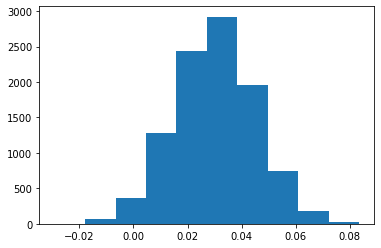

In [9]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

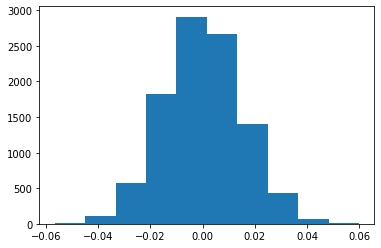

In [10]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

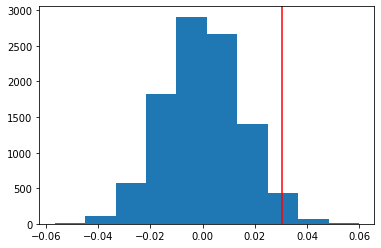

In [11]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [12]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0237

With a type I error rate of 0.05 we have evidence that the enrollment rate for this course increases when using the experimental description on its overview page

## Average reading duration

In [13]:
#get only the views
views = df.query('action == "view"')

In [14]:
#Group by id and group with the duration mean.
reading_times = views.groupby(['id','group'])['duration'].mean()

In [15]:
#reset index to keep this as a dataframe
reading_times = reading_times.reset_index()

In [16]:
#get means for control/experiment
control_mean = df.query('group == "control"')['duration'].mean()
experiment_mean = df.query('group == "experiment"')['duration'].mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [17]:
diff_means = experiment_mean - control_mean
diff_means

15.525098619574393

In [18]:
#bootstrap sample
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

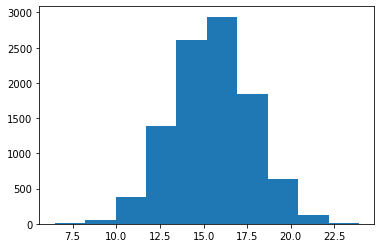

In [19]:
diffs = np.array(diffs)
plt.hist(diffs);

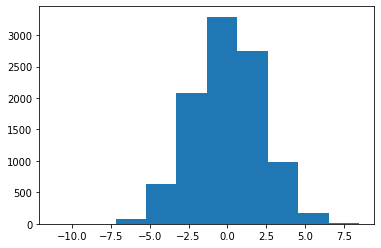

In [20]:
null_vals = np.random.normal(0.,diffs.std(),diffs.size)
plt.hist(null_vals);

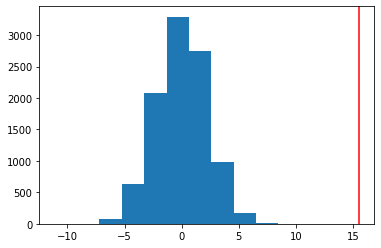

In [21]:
plt.hist(null_vals);
plt.axvline(x=diff_means,color='red');

In [22]:
(null_vals > diff_means).mean()

0.0

The difference we observe is significant, so we will reject the null.

## Average classroom time

In [23]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [24]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [25]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [26]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [27]:
# convert to numpy array
diffs = np.array(diffs)

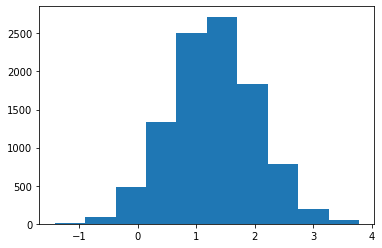

In [28]:
# plot sampling distribution
plt.hist(diffs);

In [29]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

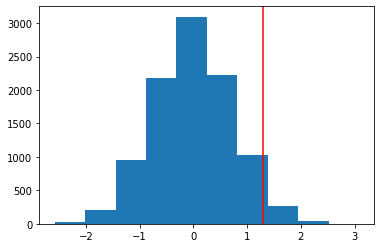

In [30]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [31]:
# compute p value
(null_vals > obs_diff).mean()

0.0399

With a type I error rate of 0.05, we have evidence that users spend more time in the classroom after seeing the experimental description in the course overview page. However, even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective.

## Completion rate

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

UsageError: Line magic function `%` not found.


In [33]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [34]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = control_df['completed'].mean()

# Display control complete rate
control_ctr

0.3719951923076923

In [35]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display experiment complete rate
experiment_ctr

0.3935334872979215

In [36]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [37]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df['completed'].mean()
    experiment_ctr = experiment_df['completed'].mean()
    diffs.append(experiment_ctr - control_ctr)

In [38]:
# convert to numpy array
diffs = np.array(diffs)

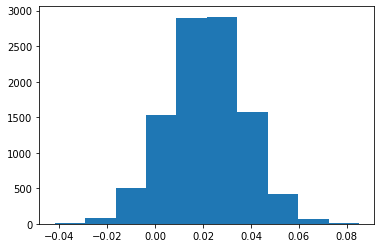

In [39]:
# plot distribution
plt.hist(diffs);

In [40]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

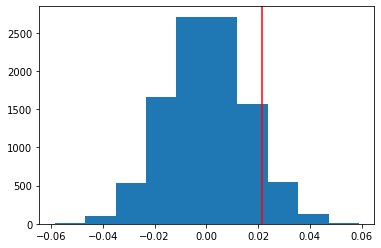

In [41]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [42]:
# compute p value
(null_vals > obs_diff).mean()

0.0895

With a type I error rate of 0.05, we do not have evidence that this course increases in completion rate when using the experimental description on its course overview page

The Bonferroni Correction is one way we could handle experiments with multiple tests or metrics in this case. To compute the new Bonferroni correct alpha value, we need to divide the original alpha value by the number of tests.

If our original alpha value was 0.05, the new Bonferroni corrected alpha value, considering we had four tests, would be 0.0125. 

Let's see which of our metrics produced statistically significant differences based on this new Bonferroni corrected alpha value. Here are the p-values computed for the four metrics in this experiment. 

    Enrollment Rate: 0.0237
    Average Reading Duration: 0
    Average Classroom Time: 0.0399
    Completion Rate: 0.0895

With the Bonferroni corrected alpha value, only Average Reading duration is staistically significant.

How can we make a recomendation when three out of five metrics had a statistically significant difference for testing each metric individually but insignificant differences when we use Bonferoni correction? The Bonferoni meathod is a conservative one and since we expect the metrics to be correlated, this would be best handled by a more sophisticated method that ideally takes this correlation into account, such as the closed testing procedure, Boole-Bonferroni bound, and the Holm-Bonferroni method. These are less conservative and take this correlation into account.